In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("..\kc_house_data.csv")
pd.set_option('precision',10)

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## 1- Crie uma nova coluna chamada: 'dormitory_type'
###   - Se o valor da coluna 'bedrooms' for igual à 1 => 'studio'
###   - Se o valor da coluna 'bedrooms' for igual a 2 => 'apartament'
###   - Se o valor da coluna 'bedrooms' for maior que 2 => 'house'

In [4]:
df['dormitory_type'] = 'standard'

df.loc[df['bedrooms'] == 1, 'dormitory_type'] = 'studio'
df.loc[df['bedrooms'] == 2, 'dormitory_type'] = 'apartament'
df.loc[df['bedrooms'] > 2, 'dormitory_type'] = 'house'

## 2- Faça um gráfico de barras que represente a soma dos preços pelo número de quartos

In [79]:
prices = df[['price', 'bedrooms']].groupby('bedrooms').sum().reset_index()

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

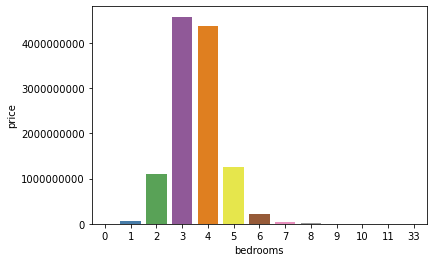

In [80]:
plt.ticklabel_format(style='plain')
sns.barplot(data = prices, x = 'bedrooms', y = 'price', palette="Set1")

## 3- Faça um gráfico de linhas que represente a média dos preços pelo ano de construção dos imóveis

In [31]:
df['year'] = pd.to_datetime(df['date']).dt.year

m_prices = df[['price', 'year']].groupby('year').mean().reset_index()

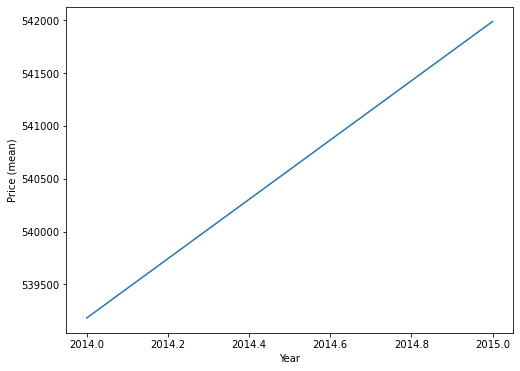

In [55]:
plt.figure(figsize = (8, 6))
plt.xlabel('Year')
plt.ylabel('Price (mean)')
plt.plot(m_prices['year'], m_prices['price'])

## 4- Faça um gráfico de barras que represente a média dos preços pelo tipo de dormitórios

In [44]:
m_prices_dormitory = df[['price', 'dormitory_type']].groupby('dormitory_type').mean().reset_index()

Text(0.5, 1.0, 'Dormitory Type x Price (mean)')

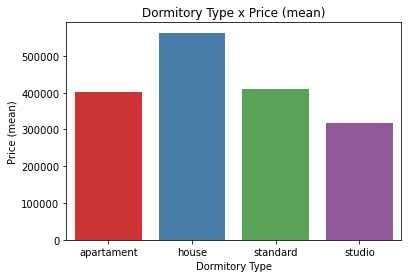

In [47]:
sns.barplot(data = m_prices_dormitory, x = 'dormitory_type', y = 'price', palette="Set1")
plt.xlabel('Dormitory Type')
plt.ylabel('Price (mean)')
plt.title('Dormitory Type x Price (mean)')

## 5- Faça um gráfico de linha que mostre a evolução da média dos preços pelo ano da reforma dos imóveis, a partir do ano de 1930.

In [48]:
data = df[df['yr_renovated'] >= 1930]

In [54]:
m_price_yr_renovated = data[['price', 'yr_renovated']].groupby('yr_renovated').mean().reset_index()

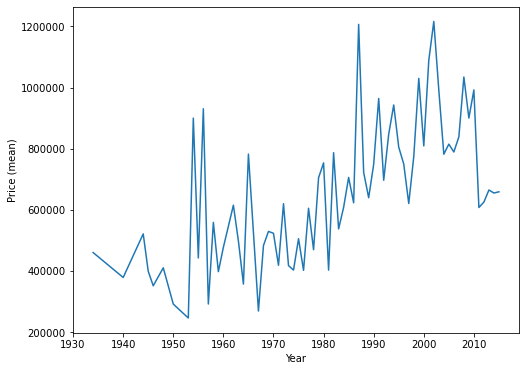

In [65]:
plt.figure(figsize = (8, 6))
plt.xlabel('Year')
plt.ylabel('Price (mean)')
plt.ticklabel_format(style='plain')
plt.plot(m_price_yr_renovated['yr_renovated'], m_price_yr_renovated['price'])

## 6- Faça uma tabela que mostre a média dos preços por ano de construção e tipo de dormitório dos imóveis

In [69]:
pd.set_option('precision',2)
df[['price', 'yr_built', 'dormitory_type']].groupby(['yr_built', 'dormitory_type']).mean().reset_index()

,yr_built,dormitory_type,price
0,1900,apartament,589533.33
1,1900,house,584854.27
2,1900,studio,398944.00
3,1901,apartament,452856.40
4,1901,house,578619.17
...,...,...,...
309,2014,house,692687.72
310,2014,studio,516500.00
311,2015,apartament,543250.00
312,2015,house,797383.06


## 7- Crie um dashboard com os gráficos das questões 02, 03 e 4 (Dashboard: 1 linha, 2 colunas)

<BarContainer object of 4 artists>

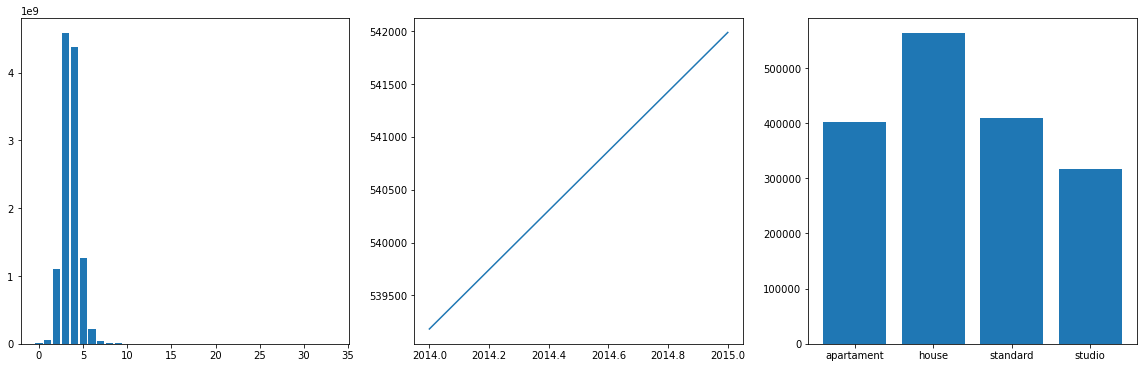

In [115]:
from matplotlib import gridspec

fig = plt.figure(figsize = (20, 6))
specs = gridspec.GridSpec(ncols = 3, nrows = 1, figure = fig)

ax1 = fig.add_subplot(specs[0, 0]) #Primeira linha inteira
ax2 = fig.add_subplot(specs[0, 1]) #Segunda linha, primeira coluna
ax3 = fig.add_subplot(specs[0, 2]) #Segunda linha, segunda coluna

#2
bedrooms_prices = df[['price', 'bedrooms']].groupby('bedrooms').sum().reset_index()
ax1.bar(bedrooms_prices['bedrooms'], bedrooms_prices['price'])

#3
df['year'] = pd.to_datetime(df['date']).dt.year
m_prices = df[['price', 'year']].groupby('year').mean().reset_index()
ax2.plot(m_prices['year'], m_prices['price'])

#4
m_prices_dormitory = df[['price', 'dormitory_type']].groupby('dormitory_type').mean().reset_index()
ax3.bar(m_prices_dormitory['dormitory_type'], m_prices_dormitory['price'])

## 8- Crie um dashboard com os gráficos das questões 02 e 04 (Dashboard: 2 colunas)

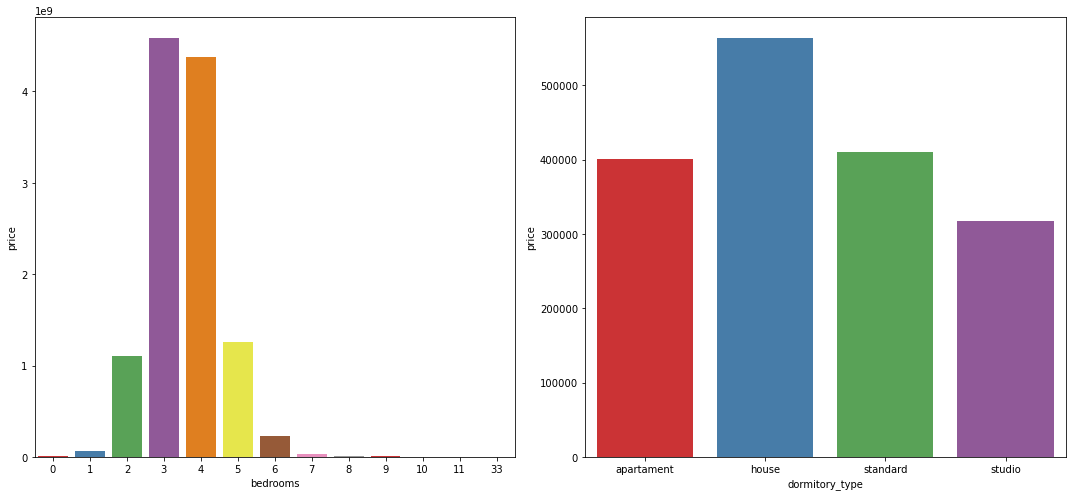

In [118]:
fig, axs = plt.subplots(1,2, figsize = (15,7))

sns.barplot(data = bedrooms_prices, x="bedrooms", y="price", ax=axs[0], palette="Set1")
sns.barplot(data = m_prices_dormitory, x="dormitory_type", y="price", ax=axs[1], palette="Set1")

fig.tight_layout()

## 9- Crie um dashboard com os gráficos das questões 03 e 05 (Dashboard: 2 linhas)

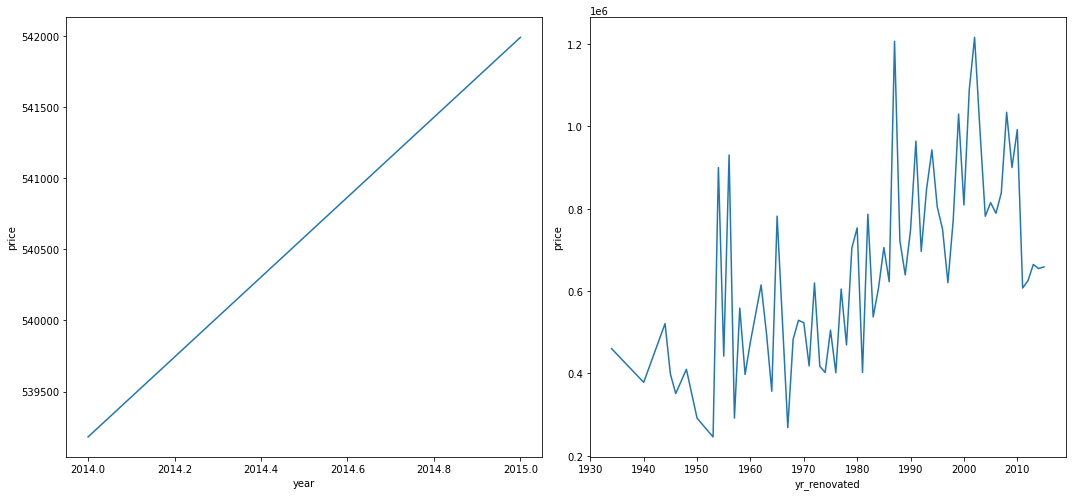

In [121]:
fig, axs = plt.subplots(1,2, figsize = (15,7))

sns.lineplot(data = m_prices, x="year", y="price", ax=axs[0])
sns.lineplot(data = m_price_yr_renovated, x="yr_renovated", y="price", ax=axs[1])

fig.tight_layout()

In [122]:
import plotly.express as px

data = df[['id', 'lat', 'long', 'sqft_living', 'dormitory_type']]

In [124]:
fig = px.scatter_mapbox(data, lat = 'lat', lon = 'long',
                        size = 'sqft_living',
                        colo
                        color_continuous_scale = px.colors.sequential.Inferno,
                        zoom = 10, size_max = 15)

fig.update_layout(mapbox_style = 'open-street-map')
fig.update_layout(height = 600, margin = {'r': 0, 't': 0, 'l': 0, 'b': 0})
fig.show()